# 상명대학교 휴먼지능정보공학과 
# 201710757 김지훈

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf 

In [3]:
import os
def manip(path, file):
  import numpy as np
  from scipy import stats
  import pandas as pd
  import csv

  df = []
  for i in file:
    val = []
    with open(path+i, 'r', encoding='utf8') as f:
      rdr = csv.reader(f)
      for j in rdr:
        val.append(j[1])
    data = []
    for l in range(len(val)):
      if l < 9:
        data.append(val[l])
      else:
        data.append(float(val[l]))
    obj = {
        'dt' : data[0],
        'min_v' : np.min(data[9:]),
        'max_v' : np.max(data[9:]),
        'mean_v' : np.mean(data[9:]),
        'median_v' : np.median(data[9:]),
        'mode_v' : stats.mode(data[9:])[0][0],
        'var_v' : np.var(data[9:]),
        'std_v' : np.std(data[9:]),
        'range_v' : np.max(data[9:]) - np.min(data[9:]),
        'Q25_v' : np.quantile(data[9:], 0.25),
        'Q75_v' : np.quantile(data[9:], 0.75),
        'IQR_v' : np.quantile(data[9:], 0.75) - np.quantile(data[9:], 0.25),
        'LB_v' : np.quantile(data[9:], 0.25) - 1.5*(np.quantile(data[9:], 0.75) - np.quantile(data[9:], 0.25)),
        'UB_v' : np.quantile(data[9:], 0.75) + 1.5*(np.quantile(data[9:], 0.75) - np.quantile(data[9:], 0.25)),
        'RMS_v' : np.sqrt(np.mean(np.power(data[9:], 2)))

    }
    df.append(obj)
  data_df = pd.DataFrame(df)
  return data_df

In [4]:
path_nm = '/content/drive/MyDrive/jihoon/colab/openSW/vibration/2.2kW/L-SF-04/정상/'
files_nm = os.listdir(path_nm)
files_nm = [file for file in files_nm if file.endswith('csv')]

df_nm = manip(path_nm, files_nm)

In [5]:
df_nm.head()

,dt,min_v,max_v,mean_v,median_v,mode_v,var_v,std_v,range_v,Q25_v,Q75_v,IQR_v,LB_v,UB_v,RMS_v
0,2020-11-25 14:12:03,-0.023572,0.023039,1.224982e-05,0.000065,-0.008676,0.000046,0.006787,0.046611,-0.004551,0.004679,0.009230,-0.018395,0.018524,0.006787
1,2020-11-25 14:11:54,-0.024242,0.023190,5.114369e-06,0.000012,-0.000639,0.000045,0.006723,0.047433,-0.004551,0.004630,0.009181,-0.018323,0.018402,0.006723
2,2020-11-25 14:12:51,-0.028437,0.022503,-1.234513e-05,0.000022,-0.004022,0.000046,0.006760,0.050940,-0.004611,0.004620,0.009231,-0.018458,0.018467,0.006760
3,2020-11-25 14:13:03,-0.024238,0.024308,-1.243958e-05,0.000036,-0.001706,0.000045,0.006722,0.048546,-0.004580,0.004596,0.009176,-0.018343,0.018359,0.006722
4,2020-11-25 14:12:36,-0.027274,0.023689,6.340273e-08,0.000044,-0.004420,0.000046,0.006795,0.050963,-0.004567,0.004704,0.009271,-0.018474,0.018611,0.006795


In [6]:
path_ab = '/content/drive/MyDrive/jihoon/colab/openSW/vibration/2.2kW/L-SF-04/베어링불량/'
files_ab = os.listdir(path_ab)
files_ab = [file for file in files_ab if file.endswith('csv')]

df_ab = manip(path_ab, files_ab)

In [7]:
df_ab.describe()

,min_v,max_v,mean_v,median_v,mode_v,var_v,std_v,range_v,Q25_v,Q75_v,IQR_v,LB_v,UB_v,RMS_v
count,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,-0.025554,0.024684,-1.907899e-07,0.000042,-0.007754,0.000050,0.007072,0.050238,-0.004814,0.004869,0.009683,-0.019338,0.019393,0.007072
std,0.001564,0.001630,1.561784e-05,0.000078,0.012216,0.000002,0.000145,0.002233,0.000118,0.000095,0.000193,0.000400,0.000375,0.000145
min,-0.031313,0.020151,-4.141676e-05,-0.000107,-0.028724,0.000046,0.006801,0.044210,-0.005107,0.004653,0.009271,-0.020234,0.018587,0.006801
25%,-0.026524,0.023783,-1.063206e-05,-0.000013,-0.022882,0.000049,0.006967,0.048732,-0.004910,0.004810,0.009544,-0.019651,0.019126,0.006967
50%,-0.025471,0.024676,-8.171036e-07,0.000033,-0.005189,0.000050,0.007067,0.050116,-0.004817,0.004867,0.009678,-0.019337,0.019394,0.007067
75%,-0.024482,0.025655,8.728489e-06,0.000095,0.002408,0.000052,0.007187,0.051720,-0.004726,0.004926,0.009830,-0.019065,0.019682,0.007187
max,-0.021895,0.028814,1.347263e-04,0.000238,0.011566,0.000055,0.007391,0.057079,-0.004503,0.005207,0.010130,-0.018475,0.020402,0.007391


In [8]:
# fig = plt.figure()
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)

# ax1.plot(df_nm['mean_v'], 'blue', linewidth=0.7)
# ax2.plot(df_ab['mean_v'], 'blue', linewidth=0.7)


In [9]:
# fig = plt.figure()
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)

# ax1.plot(df_nm['RMS_v'], 'blue', linewidth=0.7)
# ax2.plot(df_ab['RMS_v'], 'blue', linewidth=0.7)


In [10]:
# max_mean_v = max(df_ab['mean_v'])
# df_ab = df_ab[df_ab['mean_v']< max_mean_v]

# fig = plt.figure()
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)

# ax1.plot(df_nm['mean_v'], 'blue', linewidth=0.7)
# ax2.plot(df_ab['mean_v'], 'blue', linewidth=0.7)


In [11]:
# fig = plt.figure()
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)

# ax1.plot(df_nm['RMS_v'], 'blue', linewidth=0.7)
# ax2.plot(df_ab['RMS_v'], 'blue', linewidth=0.7)


In [12]:
# plt.hist(df_nm['mean_v'], bins=100, density=True, alpha=0.7, histtype='step')
# plt.hist(df_ab['mean_v'], bins=100, density=True, alpha=0.7, histtype='step')

# plt.axvline(x=np.mean(df_nm['mean_v']), color='lightblue', linestyle='--', linewidth=1)
# plt.axvline(x=np.mean(df_ab['mean_v']), color='orange', linestyle='--', linewidth=1)


In [13]:
# plt.hist(df_nm['RMS_v'], bins=100, density=True, alpha=0.7, histtype='step')
# plt.hist(df_ab['RMS_v'], bins=100, density=True, alpha=0.7, histtype='step')

# plt.axvline(x=np.mean(df_nm['RMS_v']), color='lightblue', linestyle='--', linewidth=1)
# plt.axvline(x=np.mean(df_ab['RMS_v']), color='orange', linestyle='--', linewidth=1)

In [14]:
# from scipy.stats import ttest_ind

# ttest_ind_mean = ttest_ind(df_nm['mean_v'], df_ab['mean_v'], equal_var=True)
# print('t-value : ', ttest_ind_mean.statistic)
# print('p-value : ', ttest_ind_mean.pvalue)


In [15]:
# ttest_ind_RMS = ttest_ind(df_nm['RMS_v'], df_ab['RMS_v'], equal_var=False)
# print('t-value : ', ttest_ind_RMS.statistic)
# print('p-value : ', ttest_ind_RMS.pvalue)


In [16]:
# plt.hist(df_nm['median_v'], bins=100, density=True, alpha=0.7, histtype='step')
# plt.hist(df_ab['median_v'], bins=100, density=True, alpha=0.7, histtype='step')

# plt.axvline(x=np.mean(df_nm['median_v']), color='lightblue', linestyle='--', linewidth=1)
# plt.axvline(x=np.mean(df_ab['median_v']), color='orange', linestyle='--', linewidth=1)

In [17]:
# plt.hist(df_nm['mode_v'], bins=100, density=True, alpha=0.7, histtype='step')
# plt.hist(df_ab['mode_v'], bins=100, density=True, alpha=0.7, histtype='step')

# plt.axvline(x=np.mean(df_nm['mode_v']), color='lightblue', linestyle='--', linewidth=1)
# plt.axvline(x=np.mean(df_ab['mode_v']), color='orange', linestyle='--', linewidth=1)

In [18]:
# plt.hist(df_nm['IQR_v'], bins=100, density=True, alpha=0.7, histtype='step')
# plt.hist(df_ab['IQR_v'], bins=100, density=True, alpha=0.7, histtype='step')

# plt.axvline(x=np.mean(df_nm['IQR_v']), color='lightblue', linestyle='--', linewidth=1)
# plt.axvline(x=np.mean(df_ab['IQR_v']), color='orange', linestyle='--', linewidth=1)

In [19]:
# ttest_ind_IQR = ttest_ind(df_nm['IQR_v'], df_ab['IQR_v'], equal_var=False)
# print('t-value : ', ttest_ind_IQR.statistic)
# print('p-value : ', ttest_ind_IQR.pvalue)


In [20]:
# fig = plt.figure()
# ax1 = fig.add_subplot(1,2,1)
# ax2 = fig.add_subplot(1,2,2)

# ax1.boxplot(df_nm['mean_v'])
# ax2.boxplot(df_ab['mean_v'])


In [21]:
df_nm['label'] = 'normal'
df_nm

,dt,min_v,max_v,mean_v,median_v,mode_v,var_v,std_v,range_v,Q25_v,Q75_v,IQR_v,LB_v,UB_v,RMS_v,label
0,2020-11-25 14:12:03,-0.023572,0.023039,1.224982e-05,0.000065,-0.008676,0.000046,0.006787,0.046611,-0.004551,0.004679,0.009230,-0.018395,0.018524,0.006787,normal
1,2020-11-25 14:11:54,-0.024242,0.023190,5.114369e-06,0.000012,-0.000639,0.000045,0.006723,0.047433,-0.004551,0.004630,0.009181,-0.018323,0.018402,0.006723,normal
2,2020-11-25 14:12:51,-0.028437,0.022503,-1.234513e-05,0.000022,-0.004022,0.000046,0.006760,0.050940,-0.004611,0.004620,0.009231,-0.018458,0.018467,0.006760,normal
3,2020-11-25 14:13:03,-0.024238,0.024308,-1.243958e-05,0.000036,-0.001706,0.000045,0.006722,0.048546,-0.004580,0.004596,0.009176,-0.018343,0.018359,0.006722,normal
4,2020-11-25 14:12:36,-0.027274,0.023689,6.340273e-08,0.000044,-0.004420,0.000046,0.006795,0.050963,-0.004567,0.004704,0.009271,-0.018474,0.018611,0.006795,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2020-11-25 14:52:03,-0.024040,0.023691,-2.062876e-05,-0.000015,0.003044,0.000046,0.006790,0.047731,-0.004600,0.004576,0.009175,-0.018363,0.018339,0.006790,normal
80,2020-11-25 14:52:15,-0.027487,0.024797,-9.489767e-06,0.000079,0.000110,0.000045,0.006724,0.052284,-0.004598,0.004568,0.009166,-0.018348,0.018317,0.006724,normal
81,2020-11-25 14:51:15,-0.027177,0.024163,-1.295634e-05,0.000109,-0.006954,0.000046,0.006786,0.051340,-0.004562,0.004608,0.009170,-0.018317,0.018363,0.006786,normal
82,2020-11-25 14:51:24,-0.025179,0.024313,2.400100e-06,-0.000004,-0.007773,0.000046,0.006767,0.049493,-0.004602,0.004628,0.009230,-0.018446,0.018472,0.006767,normal


In [22]:
df_ab['label'] = 'abnormal'
df_ab

,dt,min_v,max_v,mean_v,median_v,mode_v,var_v,std_v,range_v,Q25_v,Q75_v,IQR_v,LB_v,UB_v,RMS_v,label
0,2020-12-23 09:09:21,-0.026944,0.023962,-1.576701e-05,0.000136,0.004420,0.000051,0.007176,0.050907,-0.004878,0.004952,0.009829,-0.019622,0.019696,0.007176,abnormal
1,2020-12-23 09:09:03,-0.025664,0.026244,1.921917e-06,0.000151,-0.009253,0.000053,0.007259,0.051909,-0.004867,0.005076,0.009943,-0.019781,0.019991,0.007259,abnormal
2,2020-12-23 09:09:06,-0.027289,0.026688,-6.784318e-06,0.000163,-0.014109,0.000054,0.007347,0.053977,-0.004869,0.005108,0.009977,-0.019834,0.020073,0.007347,abnormal
3,2020-12-23 09:08:54,-0.025359,0.025724,1.880644e-05,0.000181,-0.006704,0.000053,0.007292,0.051083,-0.004905,0.005081,0.009986,-0.019883,0.020060,0.007292,abnormal
4,2020-12-23 09:09:24,-0.025521,0.026233,1.068140e-05,0.000135,0.004115,0.000053,0.007274,0.051754,-0.004960,0.005110,0.010070,-0.020065,0.020214,0.007274,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2020-12-23 09:22:00,-0.027001,0.024851,4.701522e-06,-0.000038,-0.001596,0.000054,0.007352,0.051851,-0.005006,0.005000,0.010006,-0.020016,0.020009,0.007352,abnormal
236,2020-12-23 09:22:06,-0.024636,0.024812,1.129908e-07,-0.000088,-0.024636,0.000052,0.007217,0.049448,-0.004960,0.004914,0.009874,-0.019772,0.019726,0.007217,abnormal
237,2020-12-23 09:21:57,-0.027585,0.024734,5.797342e-06,-0.000027,-0.005384,0.000052,0.007229,0.052319,-0.004990,0.004919,0.009909,-0.019853,0.019782,0.007229,abnormal
238,2020-12-23 09:22:21,-0.026132,0.025351,1.270682e-05,0.000053,-0.026132,0.000053,0.007259,0.051483,-0.004873,0.004987,0.009860,-0.019662,0.019777,0.007259,abnormal


In [23]:
import pandas as pd

df = pd.concat([df_nm, df_ab])
df

,dt,min_v,max_v,mean_v,median_v,mode_v,var_v,std_v,range_v,Q25_v,Q75_v,IQR_v,LB_v,UB_v,RMS_v,label
0,2020-11-25 14:12:03,-0.023572,0.023039,1.224982e-05,0.000065,-0.008676,0.000046,0.006787,0.046611,-0.004551,0.004679,0.009230,-0.018395,0.018524,0.006787,normal
1,2020-11-25 14:11:54,-0.024242,0.023190,5.114369e-06,0.000012,-0.000639,0.000045,0.006723,0.047433,-0.004551,0.004630,0.009181,-0.018323,0.018402,0.006723,normal
2,2020-11-25 14:12:51,-0.028437,0.022503,-1.234513e-05,0.000022,-0.004022,0.000046,0.006760,0.050940,-0.004611,0.004620,0.009231,-0.018458,0.018467,0.006760,normal
3,2020-11-25 14:13:03,-0.024238,0.024308,-1.243958e-05,0.000036,-0.001706,0.000045,0.006722,0.048546,-0.004580,0.004596,0.009176,-0.018343,0.018359,0.006722,normal
4,2020-11-25 14:12:36,-0.027274,0.023689,6.340273e-08,0.000044,-0.004420,0.000046,0.006795,0.050963,-0.004567,0.004704,0.009271,-0.018474,0.018611,0.006795,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2020-12-23 09:22:00,-0.027001,0.024851,4.701522e-06,-0.000038,-0.001596,0.000054,0.007352,0.051851,-0.005006,0.005000,0.010006,-0.020016,0.020009,0.007352,abnormal
236,2020-12-23 09:22:06,-0.024636,0.024812,1.129908e-07,-0.000088,-0.024636,0.000052,0.007217,0.049448,-0.004960,0.004914,0.009874,-0.019772,0.019726,0.007217,abnormal
237,2020-12-23 09:21:57,-0.027585,0.024734,5.797342e-06,-0.000027,-0.005384,0.000052,0.007229,0.052319,-0.004990,0.004919,0.009909,-0.019853,0.019782,0.007229,abnormal
238,2020-12-23 09:22:21,-0.026132,0.025351,1.270682e-05,0.000053,-0.026132,0.000053,0.007259,0.051483,-0.004873,0.004987,0.009860,-0.019662,0.019777,0.007259,abnormal


In [24]:
df = df.reset_index()
del df['index']
df

,dt,min_v,max_v,mean_v,median_v,mode_v,var_v,std_v,range_v,Q25_v,Q75_v,IQR_v,LB_v,UB_v,RMS_v,label
0,2020-11-25 14:12:03,-0.023572,0.023039,1.224982e-05,0.000065,-0.008676,0.000046,0.006787,0.046611,-0.004551,0.004679,0.009230,-0.018395,0.018524,0.006787,normal
1,2020-11-25 14:11:54,-0.024242,0.023190,5.114369e-06,0.000012,-0.000639,0.000045,0.006723,0.047433,-0.004551,0.004630,0.009181,-0.018323,0.018402,0.006723,normal
2,2020-11-25 14:12:51,-0.028437,0.022503,-1.234513e-05,0.000022,-0.004022,0.000046,0.006760,0.050940,-0.004611,0.004620,0.009231,-0.018458,0.018467,0.006760,normal
3,2020-11-25 14:13:03,-0.024238,0.024308,-1.243958e-05,0.000036,-0.001706,0.000045,0.006722,0.048546,-0.004580,0.004596,0.009176,-0.018343,0.018359,0.006722,normal
4,2020-11-25 14:12:36,-0.027274,0.023689,6.340273e-08,0.000044,-0.004420,0.000046,0.006795,0.050963,-0.004567,0.004704,0.009271,-0.018474,0.018611,0.006795,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,2020-12-23 09:22:00,-0.027001,0.024851,4.701522e-06,-0.000038,-0.001596,0.000054,0.007352,0.051851,-0.005006,0.005000,0.010006,-0.020016,0.020009,0.007352,abnormal
320,2020-12-23 09:22:06,-0.024636,0.024812,1.129908e-07,-0.000088,-0.024636,0.000052,0.007217,0.049448,-0.004960,0.004914,0.009874,-0.019772,0.019726,0.007217,abnormal
321,2020-12-23 09:21:57,-0.027585,0.024734,5.797342e-06,-0.000027,-0.005384,0.000052,0.007229,0.052319,-0.004990,0.004919,0.009909,-0.019853,0.019782,0.007229,abnormal
322,2020-12-23 09:22:21,-0.026132,0.025351,1.270682e-05,0.000053,-0.026132,0.000053,0.007259,0.051483,-0.004873,0.004987,0.009860,-0.019662,0.019777,0.007259,abnormal


In [25]:
print(df['label'].value_counts())

abnormal    240
normal       84
Name: label, dtype: int64


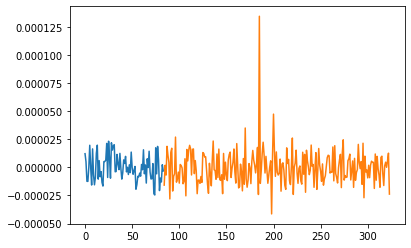

In [26]:
import matplotlib.pyplot as plt

plt.plot(df[df['label'] == 'normal']['mean_v'])
plt.plot(df[df['label'] == 'abnormal']['mean_v'])

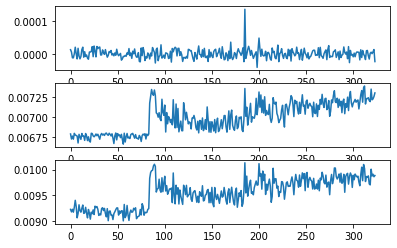

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)


ax1.plot(df['mean_v'])
ax2.plot(df['RMS_v'])
ax3.plot(df['IQR_v'])


In [28]:
variables = ['min_v', 'max_v', 'mean_v', 'median_v', 'mode_v', 'var_v',
       'std_v', 'range_v', 'Q25_v', 'Q75_v', 'IQR_v', 'LB_v', 'UB_v', 'RMS_v']
corr_df = df[variables].corr()
corr_df.style.background_gradient(cmap='RdYlGn_r')

,min_v,max_v,mean_v,median_v,mode_v,var_v,std_v,range_v,Q25_v,Q75_v,IQR_v,LB_v,UB_v,RMS_v
min_v,1.000000,0.049579,0.048103,0.042786,0.014106,-0.236019,-0.235649,-0.699565,0.147384,-0.194660,-0.179080,0.172283,-0.184804,-0.235624
max_v,0.049579,1.000000,0.072284,-0.271300,0.085937,0.270538,0.268698,0.679006,-0.271569,0.100568,0.196995,-0.218532,0.173983,0.268726
mean_v,0.048103,0.072284,1.000000,0.206022,-0.082272,0.027552,0.025971,0.016358,0.040367,0.114940,0.037635,-0.017293,0.057944,0.026160
median_v,0.042786,-0.271300,0.206022,1.000000,0.038158,-0.258260,-0.256775,-0.225550,0.334620,0.030980,-0.162930,0.209909,-0.114434,-0.256729
mode_v,0.014106,0.085937,-0.082272,0.038158,1.000000,-0.077436,-0.077887,0.051115,0.072051,-0.066010,-0.072527,0.073051,-0.071535,-0.077895
var_v,-0.236019,0.270538,0.027552,-0.258260,-0.077436,1.000000,0.999931,0.367039,-0.937114,0.879704,0.954205,-0.958230,0.944052,0.999932
std_v,-0.235649,0.268698,0.025971,-0.256775,-0.077887,0.999931,1.000000,0.365450,-0.937543,0.881171,0.955191,-0.959077,0.945171,1.000000
range_v,-0.699565,0.679006,0.016358,-0.225550,0.051115,0.367039,0.365450,1.000000,-0.302627,0.215034,0.272571,-0.282983,0.260313,0.365452
Q25_v,0.147384,-0.271569,0.040367,0.334620,0.072051,-0.937114,-0.937543,-0.302627,1.000000,-0.814686,-0.954328,0.974994,-0.927364,-0.937529
Q75_v,-0.194660,0.100568,0.114940,0.030980,-0.066010,0.879704,0.881171,0.215034,-0.814686,1.000000,0.950730,-0.923187,0.972487,0.881196


In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['label'])
df['label_en'] = encoder.transform(df['label'])

del df['dt'], df['label']

df

,min_v,max_v,mean_v,median_v,mode_v,var_v,std_v,range_v,Q25_v,Q75_v,IQR_v,LB_v,UB_v,RMS_v,label_en
0,-0.023572,0.023039,1.224982e-05,0.000065,-0.008676,0.000046,0.006787,0.046611,-0.004551,0.004679,0.009230,-0.018395,0.018524,0.006787,1
1,-0.024242,0.023190,5.114369e-06,0.000012,-0.000639,0.000045,0.006723,0.047433,-0.004551,0.004630,0.009181,-0.018323,0.018402,0.006723,1
2,-0.028437,0.022503,-1.234513e-05,0.000022,-0.004022,0.000046,0.006760,0.050940,-0.004611,0.004620,0.009231,-0.018458,0.018467,0.006760,1
3,-0.024238,0.024308,-1.243958e-05,0.000036,-0.001706,0.000045,0.006722,0.048546,-0.004580,0.004596,0.009176,-0.018343,0.018359,0.006722,1
4,-0.027274,0.023689,6.340273e-08,0.000044,-0.004420,0.000046,0.006795,0.050963,-0.004567,0.004704,0.009271,-0.018474,0.018611,0.006795,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,-0.027001,0.024851,4.701522e-06,-0.000038,-0.001596,0.000054,0.007352,0.051851,-0.005006,0.005000,0.010006,-0.020016,0.020009,0.007352,0
320,-0.024636,0.024812,1.129908e-07,-0.000088,-0.024636,0.000052,0.007217,0.049448,-0.004960,0.004914,0.009874,-0.019772,0.019726,0.007217,0
321,-0.027585,0.024734,5.797342e-06,-0.000027,-0.005384,0.000052,0.007229,0.052319,-0.004990,0.004919,0.009909,-0.019853,0.019782,0.007229,0
322,-0.026132,0.025351,1.270682e-05,0.000053,-0.026132,0.000053,0.007259,0.051483,-0.004873,0.004987,0.009860,-0.019662,0.019777,0.007259,0


In [30]:
label_df = df['label_en']
feature_df = df.drop('label_en', axis=1)
feature_df = feature_df[['IQR_v', 'RMS_v']]


# train start

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=1)

In [32]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1)

x_resampled, y_resampled = sm.fit_resample(x_train, list(y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
x_resampled.shape

(376, 2)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()

lr_clf = lr_clf.fit(x_resampled, y_resampled)
lr_pred = lr_clf.predict(x_test)

print("Logistic Regression ACC : ", accuracy_score(y_test, lr_pred))

Logistic Regression ACC :  0.8769230769230769


# Decision Tree 

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf = dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)

print("Decision Tree ACC : ", accuracy_score(y_test, dt_pred))

Decision Tree ACC :  1.0


# SVM 

In [36]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True)

svm_clf = svm_clf.fit(x_train, y_train)
svm_pred = svm_clf.predict(x_test)

print("SVM ACC : ", accuracy_score(y_test, svm_pred))

SVM ACC :  0.9538461538461539


# XGBoost

In [37]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier()

xg_clf = xg_clf.fit(x_train, y_train)
xg_pred = xg_clf.predict(x_test)

print("XGBoost ACC : ", accuracy_score(y_test, xg_pred))

XGBoost ACC :  1.0


In [38]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr_score = cross_val_score(lr_clf, x_resampled, y_resampled, cv=10)
dt_score = cross_val_score(dt_clf, x_resampled, y_resampled, cv=10)
svm_score = cross_val_score(svm_clf, x_resampled, y_resampled, cv=10)
xg_score = cross_val_score(xg_clf, x_resampled, y_resampled, cv=10)

score_list = [lr_score, dt_score, svm_score, xg_score]
clf_name = ["Logistic Regression", "Decision Tree", "SVM", "XGBoost"]

avg_acc = []
for idx, score in enumerate(score_list):
  for iter_count, accuracy in enumerate(score):
    print("{} - {} cross validation acc : {:.4f}".format(clf_name[idx], iter_count, accuracy))
  avg_acc.append(np.mean(score))
  print("\n")

for i in range(len(avg_acc)):
  print("{} avg acc : {:.4f}".format(clf_name[i], avg_acc[i]))

Logistic Regression - 0 cross validation acc : 0.9737
Logistic Regression - 1 cross validation acc : 0.9211
Logistic Regression - 2 cross validation acc : 0.9474
Logistic Regression - 3 cross validation acc : 0.9474
Logistic Regression - 4 cross validation acc : 0.9474
Logistic Regression - 5 cross validation acc : 0.9474
Logistic Regression - 6 cross validation acc : 0.4865
Logistic Regression - 7 cross validation acc : 0.4865
Logistic Regression - 8 cross validation acc : 0.4865
Logistic Regression - 9 cross validation acc : 0.4865


Decision Tree - 0 cross validation acc : 1.0000
Decision Tree - 1 cross validation acc : 1.0000
Decision Tree - 2 cross validation acc : 1.0000
Decision Tree - 3 cross validation acc : 1.0000
Decision Tree - 4 cross validation acc : 1.0000
Decision Tree - 5 cross validation acc : 1.0000
Decision Tree - 6 cross validation acc : 1.0000
Decision Tree - 7 cross validation acc : 0.9730
Decision Tree - 8 cross validation acc : 1.0000
Decision Tree - 9 cross va

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def get_clf_eval(name, y_test, pred):
  confusion_mat = confusion_matrix(y_test, pred, labels=[1,0])
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1_sc = f1_score(y_test, pred)

  print("##### {} Score #####".format(name))
  print('Confusion : \n', confusion_mat)
  print("Acc : {:.4f}, precision : {:.4f}, recall : {:.4f} f1-score : {:.4f}\n\n".format(accuracy,precision,recall,f1_sc))


pred_name = [lr_pred, dt_pred, svm_pred, xg_pred]
for i in range(len(pred_name)):
  get_clf_eval(clf_name[i], y_test, pred_name[i])

##### Logistic Regression Score #####
Confusion : 
 [[13  0]
 [ 8 44]]
Acc : 0.8769, precision : 0.6190, recall : 1.0000 f1-score : 0.7647


##### Decision Tree Score #####
Confusion : 
 [[13  0]
 [ 0 52]]
Acc : 1.0000, precision : 1.0000, recall : 1.0000 f1-score : 1.0000


##### SVM Score #####
Confusion : 
 [[13  0]
 [ 3 49]]
Acc : 0.9538, precision : 0.8125, recall : 1.0000 f1-score : 0.8966


##### XGBoost Score #####
Confusion : 
 [[13  0]
 [ 0 52]]
Acc : 1.0000, precision : 1.0000, recall : 1.0000 f1-score : 1.0000




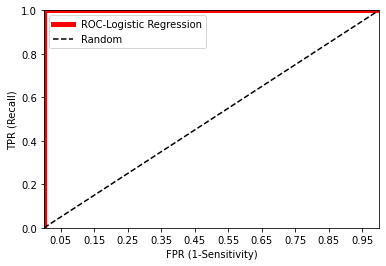

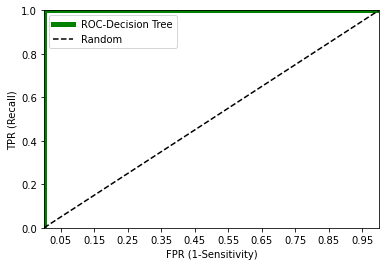

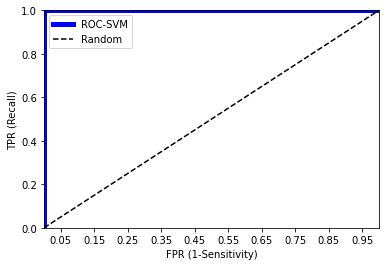

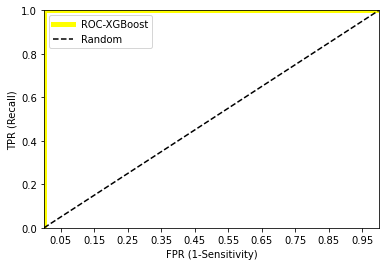

In [40]:
from sklearn.metrics import roc_curve

def roc_curve_plot(name, y_test, pred_prob_cl):
  fprs, tprs, thresholds = roc_curve(y_test, pred_prob_cl)
  # print(fprs, tprs)
  plt.plot(fprs, tprs, label='ROC-{}'.format(name[0]), color=name[1], linewidth=5)
  plt.plot([0,1], [0,1], 'k--', label='Random')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlim(0,1)
  plt.ylim(0,1)

  plt.xlabel("FPR (1-Sensitivity)")
  plt.ylabel("TPR (Recall)")
  plt.legend()

  plt.show()

# roc_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

clf_list = [lr_clf, dt_clf, svm_clf, xg_clf]
color = ['red', 'green', 'blue', 'yellow']
for i in range(len(clf_name)):
  roc_curve_plot([clf_name[i], color[i]], y_test, clf_list[i].predict_proba(x_test)[:,1])

# 감사합니다